In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### CIFAR 10 classes     airplane : 0 ,    automobile : 1  ,   bird : 2  ,   cat : 3  ,   deer : 4  ,   dog : 5  ,  frog : 6   ,  horse : 7  ,   ship : 8   ,  truck : 9

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## As we are using CNN, we don't need to flatten the input images before giving into the model

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
def my_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = Conv2D(32, 3)(inputs)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(64, 3)(x)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = MaxPooling2D()(x)
    x = Conv2D(128, 3)(x)
    x = BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [8]:
model = my_model()

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256   

### Keras Model Traiing APIs - https://keras.io/api/models/model_training_apis/

In [10]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(),
    metrics= ['accuracy']
)

In [17]:
EPOCHS = 100

In [18]:
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, verbose=2)

Epoch 1/100
782/782 - 4s - loss: 0.0499 - accuracy: 0.9830
Epoch 2/100
782/782 - 4s - loss: 0.0410 - accuracy: 0.9854
Epoch 3/100
782/782 - 3s - loss: 0.0375 - accuracy: 0.9871
Epoch 4/100
782/782 - 3s - loss: 0.0463 - accuracy: 0.9846
Epoch 5/100
782/782 - 3s - loss: 0.0431 - accuracy: 0.9851
Epoch 6/100
782/782 - 3s - loss: 0.0392 - accuracy: 0.9868
Epoch 7/100
782/782 - 3s - loss: 0.0416 - accuracy: 0.9854
Epoch 8/100
782/782 - 4s - loss: 0.0367 - accuracy: 0.9875
Epoch 9/100
782/782 - 3s - loss: 0.0379 - accuracy: 0.9865
Epoch 10/100
782/782 - 4s - loss: 0.0401 - accuracy: 0.9866
Epoch 11/100
782/782 - 3s - loss: 0.0320 - accuracy: 0.9896
Epoch 12/100
782/782 - 4s - loss: 0.0342 - accuracy: 0.9884
Epoch 13/100
782/782 - 4s - loss: 0.0409 - accuracy: 0.9861
Epoch 14/100
782/782 - 4s - loss: 0.0299 - accuracy: 0.9899
Epoch 15/100
782/782 - 4s - loss: 0.0353 - accuracy: 0.9880
Epoch 16/100
782/782 - 4s - loss: 0.0338 - accuracy: 0.9882
Epoch 17/100
782/782 - 4s - loss: 0.0363 - accura

In [19]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.9829599857330322, 0.9853600263595581, 0.9871399998664856, 0.9846000075340271, 0.9850800037384033, 0.9867799878120422, 0.9853799939155579, 0.9874600172042847, 0.9864599704742432, 0.9865999817848206, 0.9896399974822998, 0.9883800148963928, 0.9861199855804443, 0.9898599982261658, 0.9879800081253052, 0.9881600141525269, 0.988319993019104, 0.9868999719619751, 0.9906799793243408, 0.9875400066375732, 0.9892799854278564, 0.989579975605011, 0.9883599877357483, 0.9902999997138977, 0.9895600080490112, 0.990559995174408, 0.9865400195121765, 0.9919000267982483, 0.991599977016449, 0.990559995174408, 0.9897000193595886, 0.9901000261306763, 0.9901800155639648, 0.9908400177955627, 0.990559995174408, 0.9935799837112427, 0.9877200126647949, 0.9927999973297119, 0.9920200109481812, 0.991379976272583, 0.9917200207710266, 0.991919994354248, 0.9908000230789185, 0.992900013923645, 0.99235999584198, 0.9901800155639648, 0.9913399815559387, 0.9940000176429749, 0.9928600192070007, 0.9916599988937378, 0.99269998

Text(0.5, 1.0, 'Training Accuracy and Loss')

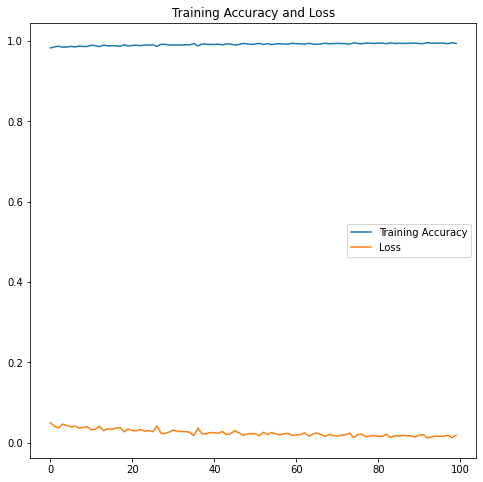

In [20]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [21]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 3.0558 - accuracy: 0.7226


[3.0557825565338135, 0.722599983215332]

In [22]:
y_pred = model.predict(x_test)

In [23]:
y_pred

array([[-13.96734   , -20.820261  , -12.712331  , ..., -31.296549  ,
          5.9629674 , -11.16504   ],
       [ -9.668589  ,  24.948889  , -21.386162  , ..., -36.931786  ,
         28.680676  ,   1.8413593 ],
       [  1.410132  ,   4.760665  , -14.186289  , ..., -16.214512  ,
         16.232334  ,  -0.47638738],
       ...,
       [-17.219072  , -35.145912  ,  -1.8136547 , ...,   0.73660964,
        -15.462001  , -20.743279  ],
       [  9.187007  ,  17.22676   , -28.133339  , ..., -38.249496  ,
        -35.436375  ,  -1.5484008 ],
       [-22.32392   , -17.459713  ,  -6.2615714 , ...,  27.505043  ,
        -20.939371  , -16.639149  ]], dtype=float32)

In [24]:
model.save('saved_models/cnn_functional_api_model.h5')